# Лобораторная работа 2.
## Перевозчиков Г. П. 405гр.

In [38]:
import math

### Задание параметрив варианта

In [57]:
n = 11
b = math.pi
phi1 = 1
phi2 = 0.0001
phi4 = 1
phi5 = 0.0001
alfa1 = 0
alfa2 = 1
alfa3 = 0
alfa4 = 0


def f_1(t):
    return 0

def f_2(t):
    return 0

def f_3(x):
    return math.sin(x)+math.cos(x)
def df_3(x):
    return -1*math.exp(-1*x)*math.cos(x)-math.exp(-1*x)*math.sin(x)
def d2f_3(x):
    return 2*math.exp(-1*x)*math.sin(x)

def f_4(x):
    return -1*alfa2**(1/2)*(math.sin(x)+math.cos(x))

def f(t, x):
    return 0

def u(t, x):
    return math.sin(x-alfa2**(1/2)*t)*math.cos(x+alfa2**(1/2)*t)

### Начальная инициализация

In [58]:
U = [[0] * n for i in range(n)]
X = [0 * n for i in range(n)]
U_p = [0 * n for i in range(n)]
h = b/10
h_t = (h**2)/2
t_end = h_t*10

### 1. Явная схема

In [59]:
x=0
t=0
for j in range(n):
    U[0][j]=f_3(x)
    X[j]=x
    x=x+h
for j in range(n):
    U[1][j]=f_3(X[j])+f_4(X[j])*h_t+(-1*alfa1*f_4(X[j])+alfa2*d2f_3(X[j])+alfa3*df_3(X[j])+alfa4*f_3(X[j]))*(h_t**2)/2

In [60]:
for i in range(2, n):
    t = t+h_t
    for j in range(1, n-1):
        U[i][j]=(1/(2+alfa1*h_t))*(4*U[i-1][j]+(alfa1*h_t-2)*U[i-2][j]+(2*alfa2*(h_t**2)/(h**2))*(U[i-1][j-1]-2*U[i-1][j]+U[i-1][j+1])+((alfa3*(h_t**2))/h)*(U[i-1][j+1]-U[i-1][j-1])+(2*h_t**2)*(alfa4*U[i-1][j]))

    U[i][0]=(phi1/(2*phi2*h-3*phi1))*(U[i][2]-4*U[i][1])+((2*h)/(2*phi2*h-3*phi1))*f_1(t)
    U[i][10]=(phi4/(3*phi4+2*phi5*h))*(-1*U[i][8]+4*U[i][9])+((2*h)/(2*phi5*h+3*phi4))*f_2(t)

In [61]:
for i in range(n):
    U_p[i] = U[10][i]
x_a = 0
X_a = [0 * n for i in range(n)]
U_a = [0 * n for i in range(n)]
t = 0
for i in range(n):
    t = t + h_t
    X_a[i] = x_a
    U_a[i] = u(t, x_a)
    x_a=x_a+h

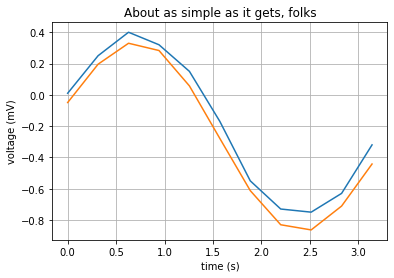

In [74]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(X,U_p,X_a,U_a)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

In [75]:
E_1=[0 * n for i in range(n)]
for i in range(n):
    E_1[i]=abs(U_a[i]-U_p[i])

### 2. Неявняю схема (способ 1)

In [64]:
x=0
t=0
for j in range(n):
    U[0][j]=f_3(x)
    X[j]=x
    x=x+h
t=t+h_t
for j in range(n):
    U[1][j]=U[0][j]+h_t*f_4(X[j])

In [65]:
for i in range(2, n):
    M = [[0] * n for i in range(n)]
    N = [0 * n for i in range(n)]
    P = [0 * n for i in range(n)]
    Q = [0 * n for i in range(n)]
    t = t+h_t
    for j in range(1, n-1):
        M[j][j-1]=2*alfa2-h*alfa3
        M[j][j]=(2*(h**2))*((-1*alfa1/h_t)-(1/(h_t**2))+alfa4)-4*alfa2
        M[j][j+1]=h*alfa3+2*alfa2
        N[j]=((-2*alfa1*(h**2))/h_t)*U[i-1][j]+((2*(h**2))/(h_t**2))*(-2*U[i-1][j]+U[i-2][j])-(2*h**2)*f(t,X[i])
    M[0][0]=phi2*h-phi1
    M[0][1]=-1*phi1
    M[10][9]=-1*phi4
    M[10][10]=h*phi5+phi4
    N[0]=h*f_1(t)
    N[10]=h*f_2(t)

    P[0]=-1*M[0][1]/M[0][0]
    Q[0]=N[0]/M[0][0]
    for j in range(1, n-1):
        P[j]=-1*M[j][j+1]/(M[j][j]+M[j][j-1]*P[j-1])
        Q[j]=(N[j]-M[j][j-1]*Q[j-1])/(M[j][j]+M[j][j-1]*P[j-1])
    P[10]=0
    Q[10]=(N[10]-M[10][9]*Q[9])/(M[10][10]+M[10][9]*P[9])
    U[i][10]=Q[10]

    for j in range(1, n-1):
        U[i][10-j]=Q[10-j]+P[10-j]*Q[10-j+1]

In [66]:
for i in range(n):
    U_p[i] = U[10][i]

# fix devision by zero
U_p[10] = U_p[10]*0.1

x_a = 0
X_a = [0 * n for i in range(n)]
U_a = [0 * n for i in range(n)]
t = 0
for i in range(n):
    t = t + h_t
    X_a[i] = x_a
    U_a[i] = u(t, x_a)
    x_a=x_a+h

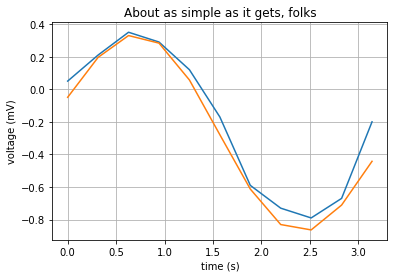

In [79]:
fig, ax = plt.subplots()
ax.plot(X,U_p,X_a,U_a)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

In [68]:
E_2=[0 * n for i in range(n)]
for i in range(n):
    E_2[i]=abs(U_a[i]-U_p[i])

### 3. Неявная схема (способ 2)

In [69]:
x=0
t=0
for j in range(n):
    U[0][j]=f_3(x)
    X[j]=x
    x=x+h
t=t+h_t
for j in range(n):
    U[1][j]=f_3(X[j])+f_4(X[j])*h_t+(-1*alfa1*f_4(X[j])+alfa2*d2f_3(X[j])+alfa3*df_3(X[j])+alfa4*f_3(X[j]))*((h_t**2)/2)
t=t+h_t
for j in range(1, n-1):
    U[2][j]=(1/(2+alfa1*h_t))*(4*U[1][j]+(alfa1*h_t-2)*U[1][j]+(2*alfa2*(h_t**2)/(h**2))*(U[1][j-1]-2*U[1][j]+U[1][j+1])+((alfa3*(h_t**2))/h)*(U[1][j+1]-U[1][j-1])+(2*h_t**2)*(alfa4*U[1][j]))
U[2][0]=(phi1/(2*phi2*h-3*phi1))*(U[2][2]-4*U[2][1])+((2*h)/(2*phi2*h-3*phi1))*f_1(t)
U[2][10]=(phi4/(3*phi4+2*phi5*h))*(-1*U[2][8]+4*U[2][9])+((2*h)/(2*phi5*h+3*phi4))*f_2(t)

In [70]:
for i in range(3,n):
    M = [[0] * n for i in range(n)]
    N = [0 * n for i in range(n)]
    P = [0 * n for i in range(n)]
    Q = [0 * n for i in range(n)]
    t = t+h_t
    for j in range(1, n-1):
        M[j][j-1]=2*alfa2-alfa3*h
        M[j][j]=(2*h**2*alfa4)-((4*h**2)/(h_t**2))-((3*(h**2)*alfa1)/h_t)-4*alfa2
        M[j][j+1]=2*alfa2+alfa3*h
        N[j]=((2*h**2)/(h_t**2))*(-5*U[i-1][j]+4*U[i-2][j]-U[i-3][j])+((alfa1*(h**2))/h_t)*(-4*U[i-1][j]+U[i-2][j])-(2*h**2)*f(t,X[i])
    M[0][0]=phi2+((phi1*2*alfa2)/(h*(2*alfa2-h*alfa3)))*(-1-((h**2)/(2*alfa2))*(2/(h_t**2)+(3*alfa1)/(2*h_t)-alfa4))
    M[0][1]=(phi1*2*alfa2)/(h*(2*alfa2-h*alfa3))
    M[10][9]=(phi4*2*alfa2)/(h*(2*alfa2-h*alfa3))
    M[10][10]=phi5+((phi4*2*alfa2)/(h*(2*alfa2-h*alfa3)))*(-1-((h**2)/(2*alfa2))*(2/(h_t**2)+(3*alfa1)/(2*h_t)-alfa4))
    N[0]=f_1(t)
    N[10]=f_2(t)

    P[0]=-1*M[0][1]/M[0][0]
    Q[0]=N[0]/M[0][0]
    for j in range(1, n-1):
        P[j]=-M[j][j+1]/(M[j][j]+M[j][j-1]*P[j-1])
        Q[j]=(N[j]-M[j][j-1]*Q[j-1])/(M[j][j]+M[j][-1]*P[j-1])
    P[10]=0
    Q[10]=(N[10]-M[10][9]*Q[9])/(M[10][10]+M[10][9]*P[9])
    U[i][10]=Q[10]
    for j in range(1, n-1):
        U[i][10-j]=Q[10-j]+P[10-j]*Q[10-j+1]

In [71]:
for i in range(n):
    U_p[i] = U[10][i]

x_a = 0
X_a = [0 * n for i in range(n)]
U_a = [0 * n for i in range(n)]
t = 0
for i in range(n):
    t = t + h_t
    X_a[i] = x_a
    U_a[i] = u(t, x_a)
    x_a=x_a+h

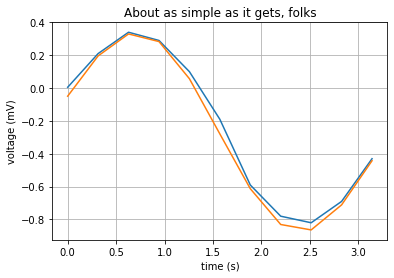

In [81]:
fig, ax = plt.subplots()
ax.plot(X,U_p,X_a,U_a)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

In [55]:
E_3=[0 * n for i in range(n)]
for i in range(n):
    E_3[i]=abs(U_a[i]-U_p[i])

### Погрешности

In [56]:
print('|       |','|  absolute |','|  absolute |','|  absolute |')
print('|   x   |','|   error   |','|   error   |','|   error   |')
print('|       |','| "explict" |','| "implict" |','| "exp-imp" |')
print('|=======|','|===========|','|===========|','|===========|')
for i in range(n):
    print('|{:6.5f}| |{:10.9f}| |{:10.9f}| |{:10.9f}|'.format(X[i], E_1[i], E_2[i], E_3[i]))

|       | |  absolute | |  absolute | |  absolute |
|   x   | |   error   | |   error   | |   error   |
|       | | "explict" | | "implict" | | "exp-imp" |
|=======| |===========| |===========| |===========|
|0.00000| |0.114404831| |0.114404831| |0.114404831|
|0.15708| |0.096710238| |0.097751627| |0.058960475|
|0.31416| |0.072091232| |0.071117625| |0.051889472|
|0.47124| |0.050104301| |0.049231355| |0.048984858|
|0.62832| |0.032768396| |0.032050972| |0.044134264|
|0.78540| |0.019798329| |0.019225208| |0.037659218|
|0.94248| |0.010666437| |0.010222888| |0.030165134|
|1.09956| |0.004752688| |0.004422576| |0.022213169|
|1.25664| |0.001411853| |0.001181463| |0.014289080|
|1.41372| |0.000017705| |0.000085498| |0.006788476|
|1.57080| |0.000017500| |0.000002081| |0.000034031|
